t-SNE: 1.9 sec


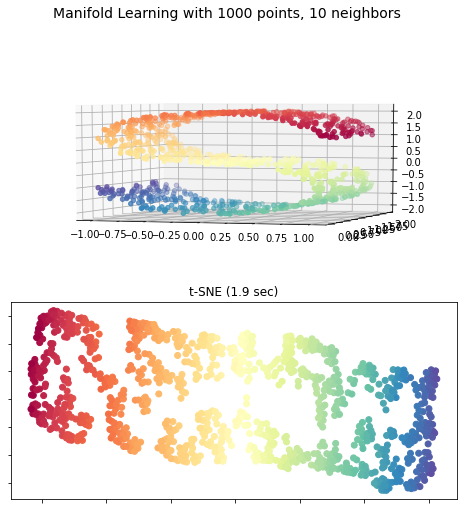

In [3]:

# 对S曲线数据集降维

from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

n_points = 1000

X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(8, 8))

plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)  

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)  
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  
ax = fig.add_subplot(2, 1, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_major_formatter(NullFormatter())

plt.show()

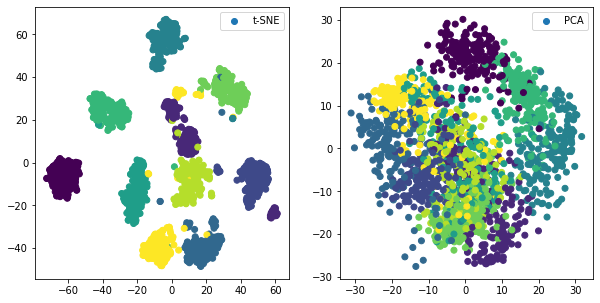

In [4]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

digits = load_digits()
X_tsne = TSNE(n_components=2,random_state=33).fit_transform(digits.data)
X_pca = PCA(n_components=2).fit_transform(digits.data)

ckpt_dir="images"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target,label="t-SNE")
plt.legend()
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target,label="PCA")
plt.legend()
plt.savefig('images/digits_tsne-pca.png', dpi=120)
plt.show()

Starting compute t-SNE Embedding... 


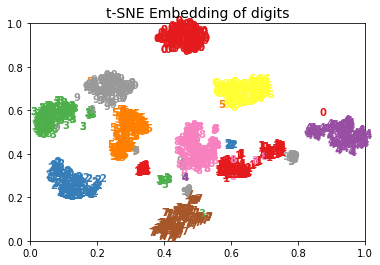

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE


# 加载数据
def get_data():
    """
    :return: 数据集、标签、样本数量、特征数量
    """
    digits = datasets.load_digits(n_class=10)
    data = digits.data      # 图片特征
    label = digits.target       # 图片标签
    n_samples, n_features = data.shape      # 数据集的形状
    return data, label, n_samples, n_features


# 对样本进行预处理并画图
def plot_embedding(data, label, title):
    """
    :param data:数据集
    :param label:样本标签
    :param title:图像标题
    :return:图像
    """
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)     # 对数据进行归一化处理
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图
    # 遍历所有样本
    for i in range(data.shape[0]):
        # 在图中为每个数据点画出标签
        plt.text(data[i, 0], data[i, 1], str(label[i]), color=plt.cm.Set1(label[i] / 10),
                 fontdict={ 'weight' :  'bold' ,  'size' : '10'})
    plt.xticks()        # 指定坐标的刻度
    plt.yticks()
    plt.title(title, fontsize=14)
    # 返回值
    return fig


# 主函数，执行t-SNE降维
def main():
    data, label , n_samples, n_features = get_data()        # 调用函数，获取数据集信息
    print( "Starting compute t-SNE Embedding... ")
    ts = TSNE(n_components=2, init= "pca" , random_state=0)
    # t-SNE降维
    result = ts.fit_transform(data)
    # 调用函数，绘制图像
    fig = plot_embedding(result, label,  "t-SNE Embedding of digits" )
    # 显示图像
    plt.show()


# 主函数
#if __name__ ==  __main__ :
main()